    n_components  n_iter  RSVD Time (s)  RSVD MSE  Regular SVD Time (s)  \
0             10       0       0.052006  0.044430              0.532107   
1             10       2       0.074029  0.034194              0.559963   
2             10       5       0.117626  0.034142              0.588692   
3             10      10       0.200057  0.034142              0.606243   
4             50       0       0.071585  0.021349              0.580688   
5             50       2       0.095535  0.011710              0.546736   
6             50       5       0.193684  0.011576              0.557827   
7             50      10       0.258810  0.011568              0.542788   
8            100       0       0.107508  0.012180              0.549789   
9            100       2       0.141038  0.005722              0.589197   
10           100       5       0.267688  0.005610              0.568158   
11           100      10       0.442739  0.005598              0.567163   
12           200       0 

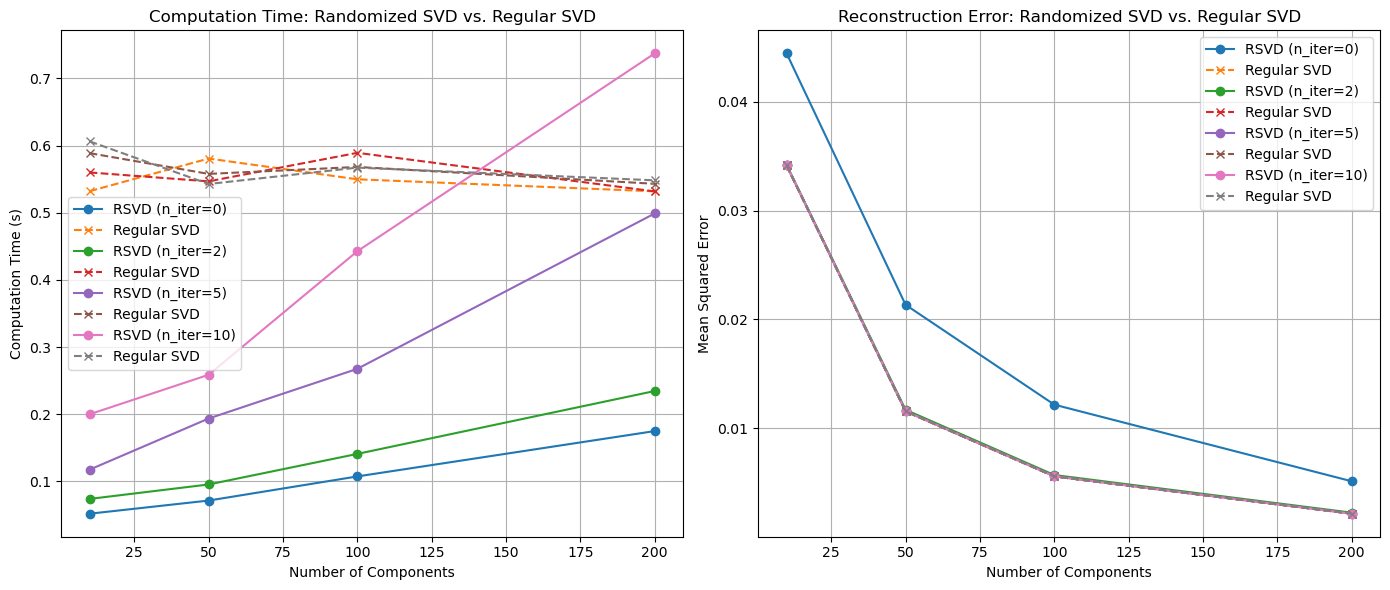

In [13]:
import numpy as np
from sklearn.utils.extmath import randomized_svd
from sklearn.metrics import mean_squared_error
from time import time
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784', version=1)
X = mnist.data[:10000].to_numpy() / 255.0  
n_components_list = [10, 50, 100, 200]
n_iter_list = [0, 2, 5, 10]
n_oversamples_list = [10]  

results = []

for n_components in n_components_list:
    for n_iter in n_iter_list:
        # Randomized SVD
        start_time = time()
        U, Sigma, VT = randomized_svd(X, n_components=n_components, n_iter=n_iter, random_state=42)
        X_rsvd_reconstructed = np.dot(U, np.dot(np.diag(Sigma), VT))
        rsvd_time = time() - start_time
        rsvd_mse = mean_squared_error(X, X_rsvd_reconstructed)
        
        # Regular SVD
        start_time = time()
        U_full, Sigma_full, VT_full = np.linalg.svd(X, full_matrices=False)
        U = U_full[:, :n_components]
        Sigma = Sigma_full[:n_components]
        VT = VT_full[:n_components, :]
        X_svd_reconstructed = np.dot(U, np.dot(np.diag(Sigma), VT))
        svd_time = time() - start_time
        svd_mse = mean_squared_error(X, X_svd_reconstructed)
        
        # Store results
        results.append({
            'n_components': n_components,
            'n_iter': n_iter,
            'RSVD Time (s)': rsvd_time,
            'RSVD MSE': rsvd_mse,
            'Regular SVD Time (s)': svd_time,
            'Regular SVD MSE': svd_mse
        })

import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
for n_iter in n_iter_list:
    subset = results_df[results_df['n_iter'] == n_iter]
    ax[0].plot(subset['n_components'], subset['RSVD Time (s)'], marker='o', label=f'RSVD (n_iter={n_iter})')
    ax[0].plot(subset['n_components'], subset['Regular SVD Time (s)'], marker='x', linestyle='--', label='Regular SVD')
ax[0].set_xlabel('Number of Components')
ax[0].set_ylabel('Computation Time (s)')
ax[0].set_title('Computation Time: Randomized SVD vs. Regular SVD')
ax[0].legend()
ax[0].grid(True)
for n_iter in n_iter_list:
    subset = results_df[results_df['n_iter'] == n_iter]
    ax[1].plot(subset['n_components'], subset['RSVD MSE'], marker='o', label=f'RSVD (n_iter={n_iter})')
    ax[1].plot(subset['n_components'], subset['Regular SVD MSE'], marker='x', linestyle='--', label='Regular SVD')
ax[1].set_xlabel('Number of Components')
ax[1].set_ylabel('Mean Squared Error')
ax[1].set_title('Reconstruction Error: Randomized SVD vs. Regular SVD')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()